Arden Chaing

Phys 434

October 15th 2020

Homework2

In [10]:
# necessary imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=20)
matplotlib.rc('figure', figsize=(18, 10))
import scipy
from scipy import stats
import pandas as pd

In [11]:
# 1 (snake eyes)
def snakeEyes(singleOne) :
    return (singleOne * singleOne)

# 1 (sum of seven)
def Probability(value) : 
    success = 0.0
  
    # To calculate successful outcomes with two dices thrown once each
    for i in range(1, 7) : 
        for j in range(1, 7) : 
            if ((i + j) == value) : 
                success += 1
  
    return int(success) 

# main method
if __name__ == "__main__" :
    
    singleOne, totalOutcomes = 1, 6
    print ("Probablity of snake eyes: ", snakeEyes(singleOne), "/", totalOutcomes**2)
            
    value, times = 7, 1
    print("Probablity of sum of ", value, ": ", Probability(value), "/", totalOutcomes**2)
    
    print("Ratio of snake eyes to sum of seven is ", snakeEyes(singleOne), ":", Probability(value))

Probablity of snake eyes:  1 / 36
Probablity of sum of  7 :  6 / 36
Ratio of snake eyes to sum of seven is  1 : 6


Problem 1: In order to find which is more probably, rolling snake eyes or rolling seven, we first must find their own respective probablities. In order to find the probablity of snake eyes, we must find the probablity of rolling a one AND another one. We can use the rule that P(A and B) = P(A)P(B) to calculate that. Which is 1/36. In order to find the probablity of rolling a seven, we can first figure out all the outcomes that produce a sum of seven. Then divide the number of successful events by the number of total events. Which is 6/36. now we want to find the ratio of the probablities which yields 1:6. It's simple as since both events have the same denominator, we can remove them and look at the ratios of the numerators. This ratio can be read that for every rolled snake eyes, one can expect six rolled sum of seven.

Problem 2: Analytically we can find the probablity of any sum of two six-sided day by either counting the possible outcomes or using the discrete convolution theorem. Say we are trying to find the probability of rolling a sum of 9. Using the easiest method, we can just count what specific event must occur. [Die 1, Die 2] = [3, 6] [4, 5] [5, 4] [6, 3]. We know that there are 36 total outcomes from rolling two six-sided die, therefore the probablity of rolling a sum of 9 is the outcomes counted (4) divided by the total outcomes (36). We can also discover it mathematically by using the convolution function. So to find the probability of sum 9, we take the summation of P(3)P(9-3) + P(4)P(9-4) + P(5)P(9-5) + P(6)P(9-6) = (1/6)(1/6) * 4 = 4/36 which matches the counting method we did above. 

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


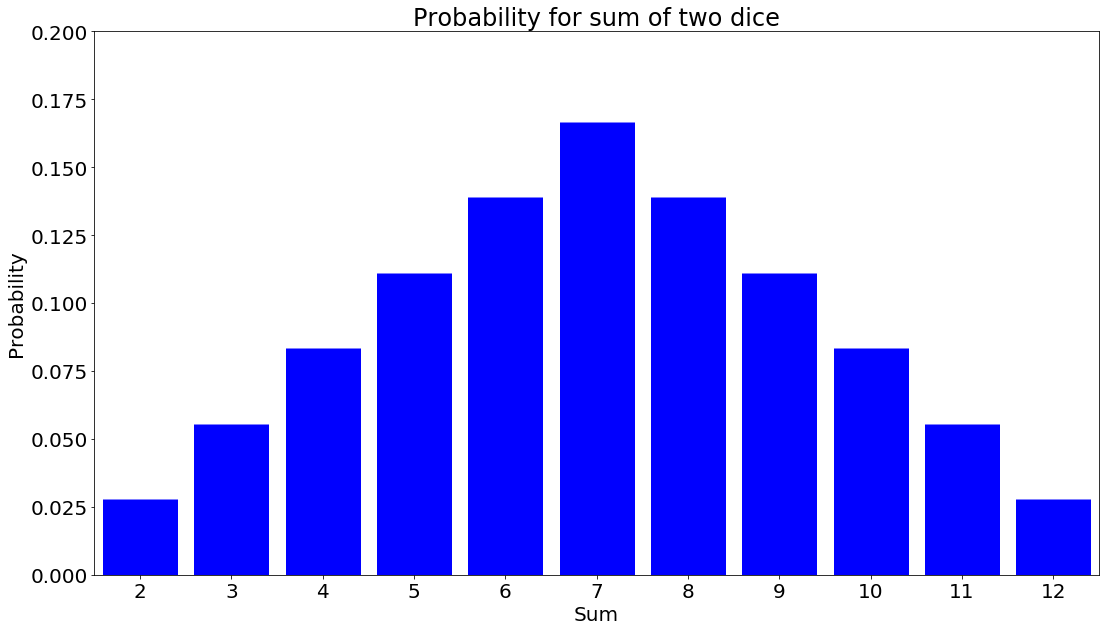

1.0000000000000002


In [12]:
# 2 (sum of two six-sided die)
die = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6] # store the probabilities of rolling each value on a six sided die
probTwoDie = np.convolve(die, die)
print(probTwoDie) # visually see the probablities for each sum

# plot the sum probablities
plt.title("Probability for sum of two dice")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.xticks(range(2, 13))
plt.ylim(0, 0.2)
plt.vlines(range(2, 13), 0, probTwoDie, linewidth = 75, color = 'b')
plt.show()

# verify that we have included all the possible outcomes
checkOne = 0
for i in probTwoDie :
    checkOne += i
print(checkOne)

Problem 2: Now above we also did it numerically with a computer program utilizing the convolution operator. Above you can see an array that represents the probablity of rolliong a sum of X with two six-sided. The array starts at sum of 2 and ends at sum of 12. You can see from the graph that the probablities are symmetric around the median. Also we double checked our array holds all the possible sums of two standard die by seeing that the sum of all the values is one.

In [13]:
# 3 (calculate mean and variance from problem 2)
mean = np.sum(np.arange(2, 13) * probTwoDie)
variance = np.sum((np.arange(2, 13))**2 * probTwoDie) - mean**2
print("mean: ", mean)
print("variance: ", variance)

mean:  6.999999999999998
variance:  5.833333333333357


Problem 3: In order to find the mean of the distribution above we can do by finding the sum of all elemenents multplied by their respective probablities. Also the variance is defined as the sum of all the differences of each element from the mean squared, multiplied by their probabilities. So therefore the mean is 7 and the variance is 5.83.

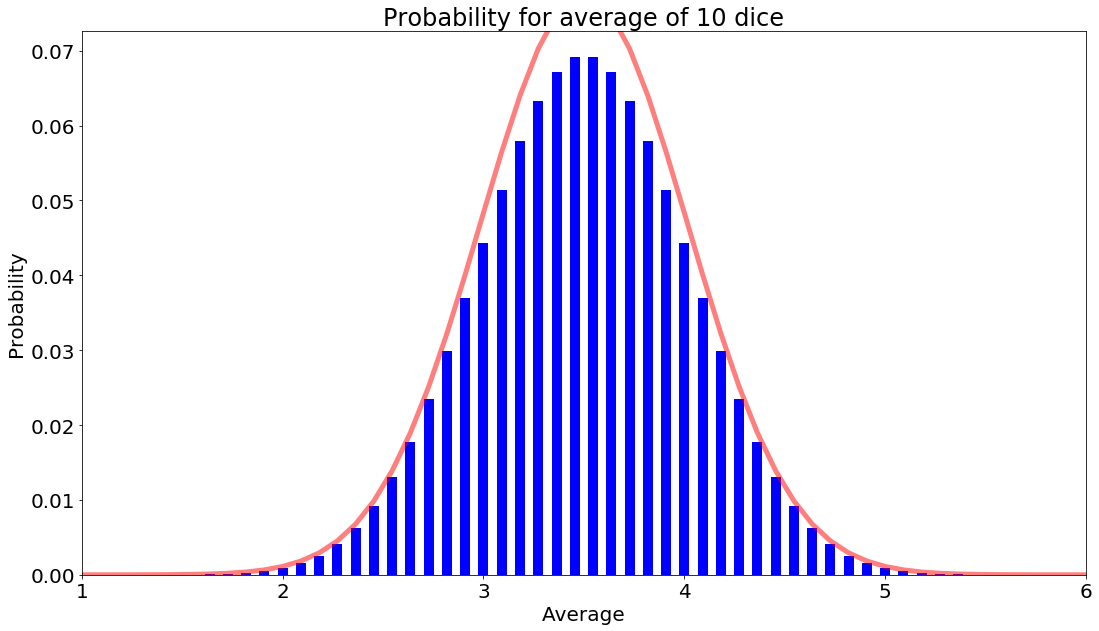

In [14]:
# 4 (plot average of 10 dice)
avg_probs = np.copy(die)
for i in range(10):
    avg_probs = np.convolve(die, avg_probs) #convolve itself 10 times

# graphing average distribution of 10 dice
plt.title("Probability for average of 10 dice")
plt.xlabel("Average")
plt.ylabel("Probability")
possible_avgs = np.linspace(1, 6, len(avg_probs))
plt.vlines(possible_avgs, 0, avg_probs, linewidth = 10, color = 'b');
plt.xlim(1, 6)
plt.ylim(0, None)

# overlaying gaussian
mean = np.sum(possible_avgs * avg_probs)
variance = np.sum((possible_avgs - mean)**2 * avg_probs)
ax = plt.gca()
ax.plot(possible_avgs, stats.norm.pdf(possible_avgs, mean, np.sqrt(variance)) / 10, linewidth = 5, alpha =0.5, color = 'r')
plt.show()

Problem 4: Above I have graphed the average of 10 dice and have overalyed the respective gaussian ontop of that. As you can see it's starting to look very close to a normal distribution. However, according to the central limit theorem, as the sample size gets larger, the sampling the distribution of the sample mean approaches a gaussian distribution. Thus if we keep convoluting the original distribution onto itself, then the resulting distribution will look more and more like a normal distribution. We can see that's true below as we increase the sample size to 40 then 100.

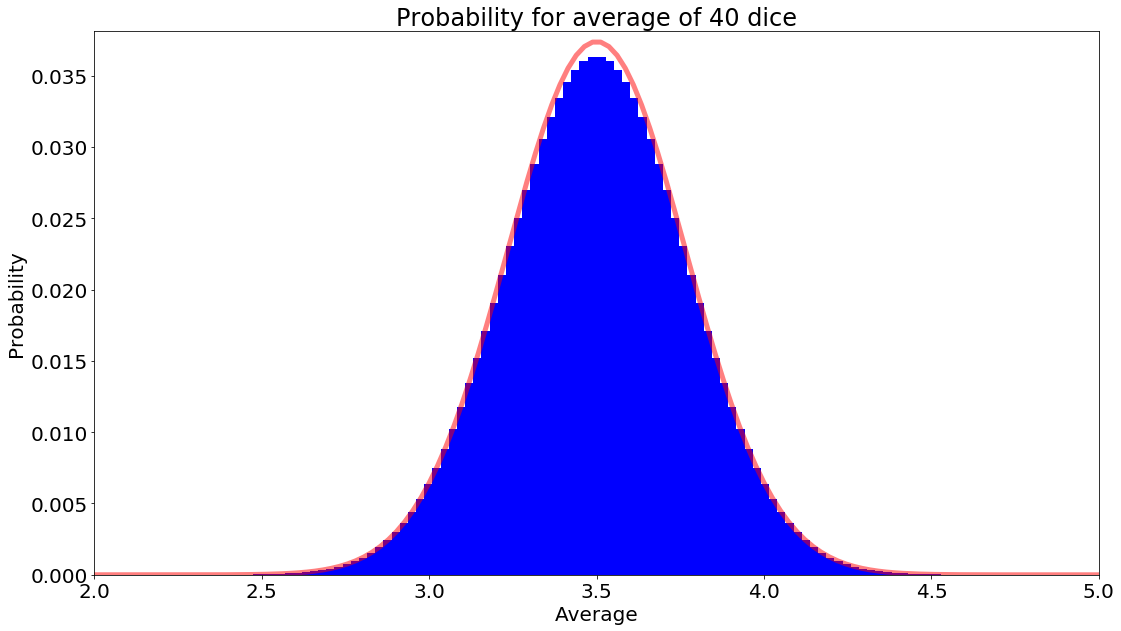

In [15]:
# 4 (plot of 40 dice)
avg_probs = np.copy(die)
for i in range(40):
    avg_probs = np.convolve(die, avg_probs) #convolve itself 10 times

# graphing average distribution of 40 dice
plt.title("Probability for average of 40 dice")
plt.xlabel("Average")
plt.ylabel("Probability")
possible_avgs = np.linspace(1, 6, len(avg_probs))
plt.vlines(possible_avgs, 0, avg_probs, linewidth = 10, color = 'b');
plt.xlim(2, 5)
plt.ylim(0, None)

# overlaying gaussian
mean = np.sum(possible_avgs * avg_probs)
variance = np.sum((possible_avgs - mean)**2 * avg_probs)
ax = plt.gca()
ax.plot(possible_avgs, stats.norm.pdf(possible_avgs, mean, np.sqrt(variance)) / 40, linewidth = 5, alpha =0.5, color = 'r')
plt.show()

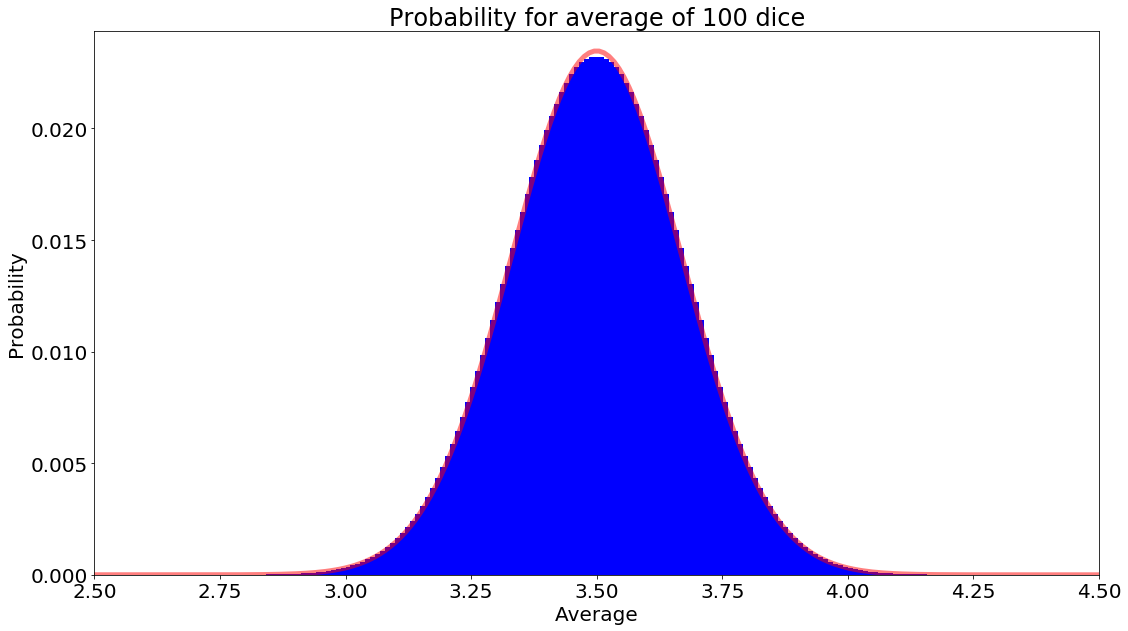

In [16]:
# 4 (plot of 100 dice)
avg_probs = np.copy(die)
for i in range(100):
    avg_probs = np.convolve(die, avg_probs) #convolve itself 10 times

# graphing average distribution of 100 dice
plt.title("Probability for average of 100 dice")
plt.xlabel("Average")
plt.ylabel("Probability")
possible_avgs = np.linspace(1, 6, len(avg_probs))
plt.vlines(possible_avgs, 0, avg_probs, linewidth = 10, color = 'b');
plt.xlim(2.5, 4.5)
plt.ylim(0, None)

# overlaying gaussian
mean = np.sum(possible_avgs * avg_probs)
variance = np.sum((possible_avgs - mean)**2 * avg_probs)
ax = plt.gca()
ax.plot(possible_avgs, stats.norm.pdf(possible_avgs, mean, np.sqrt(variance)) / 100, linewidth = 5, alpha =0.5, color = 'r')
plt.show()

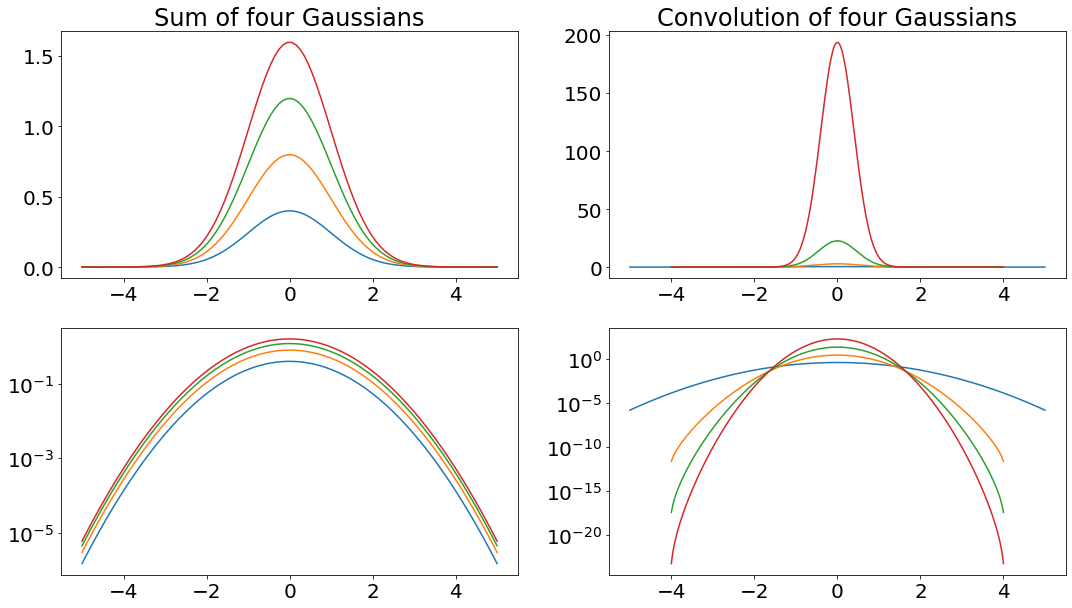

In [17]:
# 5 (sum and average of Gaussian)
dist = stats.norm()
x = np.linspace(-5, 5, 100)

ax_1 = plt.subplot(2, 2, 1)
ax_1.set_title("Sum of four Gaussians")
ax_1.plot(x, dist.pdf(x))
ax_1.plot(x, dist.pdf(x) + dist.pdf(x))
ax_1.plot(x, dist.pdf(x) + dist.pdf(x) + dist.pdf(x))
ax_1.plot(x, dist.pdf(x) + dist.pdf(x) + dist.pdf(x) + dist.pdf(x))

ax_2 = plt.subplot(2, 2, 2)
ax_2.set_title("Convolution of four Gaussians")
ax_2.plot(x, dist.pdf(x))
avg = np.convolve(dist.pdf(x), dist.pdf(x))
avg_2 = np.convolve(avg, dist.pdf(x))
avg_3 = np.convolve(avg_2, dist.pdf(x))
ax_2.plot(np.linspace(-4, 4, len(avg)), avg)
ax_2.plot(np.linspace(-4, 4, len(avg_2)), avg_2)
ax_2.plot(np.linspace(-4, 4, len(avg_3)), avg_3)

ax_3 = plt.subplot(2, 2, 3)
ax_3.semilogy(x, dist.pdf(x))
ax_3.semilogy(x, dist.pdf(x) + dist.pdf(x))
ax_3.semilogy(x, dist.pdf(x) + dist.pdf(x) + dist.pdf(x))
ax_3.semilogy(x, dist.pdf(x) + dist.pdf(x) + dist.pdf(x) + dist.pdf(x))

ax_4 = plt.subplot(2, 2, 4)
ax_4.semilogy(x, dist.pdf(x))
ax_4.semilogy(np.linspace(-4, 4, len(avg)), avg)
ax_4.semilogy(np.linspace(-4, 4, len(avg_2)), avg_2);
ax_4.semilogy(np.linspace(-4, 4, len(avg_3)), avg_3);

Problem 5: Above we can see both the sum (left side) and average (right side) of a Gaussian distribution. Below each standard normal PDF graph is their respective log scale graph. We can see that in both cases, the log graphs both still showcase a similar shape - the downwards parabola. Thus the sum and convolution of a Gausian distribution is also a Gaussian. However, the resulting standard deviation after summing and convolution are not the same. Seen in the log scale graphs, the standard deviations of the sum of Gaussian distributions don't seem to change at all. However, after convolution the resulting standard deviations seem to grow smaller and smaller. This is a huge observation which can lead to the claim that one could possibly eliminate uncertainty (standard deviation) of a measurement by averaging successive independent measurements. 